# Van der Pol oscillator

---

This notebook implements the [Van der Pol oscillator](http://www.scholarpedia.org/article/Van_der_Pol_oscillator) in Julia. Similar to the [Duffing oscillator](http://localhost:8888/notebooks/Duffing%20oscillator.ipynb#Duffing-Oscillator), Van der Pol oscillator is also a chaotic and stiff problem.

![Van der Pol oscillator](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Vanderpol_mu%3D5.svg/500px-Vanderpol_mu%3D5.svg.png)

Image courtesy of [WikiMedia](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/VanderPol-lc.svg/278px-VanderPol-lc.svg.png)

![Van der Pol oscillator limit cycle](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fa/VanderPol-lc.svg/278px-VanderPol-lc.svg.png)

Image courtesy of [WikiMedia](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Vanderpol_mu%3D5.svg/500px-Vanderpol_mu%3D5.svg.png)

This system is described by a second-order differential equation. In the following equation, $t$ represents time, and $x$ is the function of position.

$$ \frac{d^2x}{dt^2} - \epsilon ( 1 - x^2 ) \frac{dx}{dt} + x = 0 $$

---

In the following notebook, the system will be solved will be a <i><b>forced</i></b> Van der Pol oscillator. 

As form:

$$ \frac{d^2x}{dt^2} - \epsilon ( 1 - x^2 ) \frac{dx}{dt} + x = A sin ( \omega t ) $$

---

In order to use the ODE.jl package to solve this problem. We need to rewrite this second-oder differential equation into a system of first-order differential equations as following.

$$ \begin{cases} 
  v'(t) = \epsilon ( 1 - x^2 ) v - x + A sin ( \omega t )
  \\\\ 
  x'(t) = v(t)
\end{cases} $$

---


In [1]:
using PyPlot
using ODE

In [2]:
function VanDerPolOscillator(t, y)
    (v, x) = y

    v_prime = ϵ * (1 - x ^ 2) * v - x + A * sin(ω * t)
    x_prime = v

    [v_prime, x_prime]
end;

<b>Set parameter values</b>

In [3]:
ϵ = 4.0;
ω = 3*π;
A = 1.2;

<b>Set initial values and time interval. <i>Attention</i>: The initial values have to correspond to what the previous function returns.</b>

In [4]:
start = [0.01, 0.0];
time = [0:0.0125:50;];

<b>Since the Van derr Pol oscillator is a stiff system, it needs to use ode23s to solve it.</b>

In [5]:
(t, y) = ode23s(VanDerPolOscillator, start, time, reltol=1e-9, abstol=1e-9);

<b>Extract velocity $x'(t)$ and position $x(t)$</b>

In [6]:
velocity = map(f -> f[1], y);
position = map(f -> f[2], y);

<b>Plot velocity $x'(t)$ and position $x(t)$ in time scale</b>

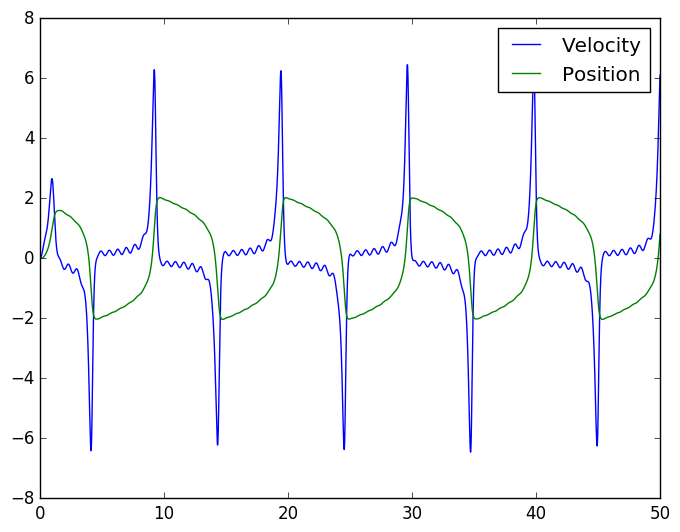

In [7]:
PyPlot.plot(t, velocity, label="Velocity");
PyPlot.plot(t, position, label="Position");
legend();

Plot [limit cycle](https://en.wikipedia.org/wiki/Limit_cycle)

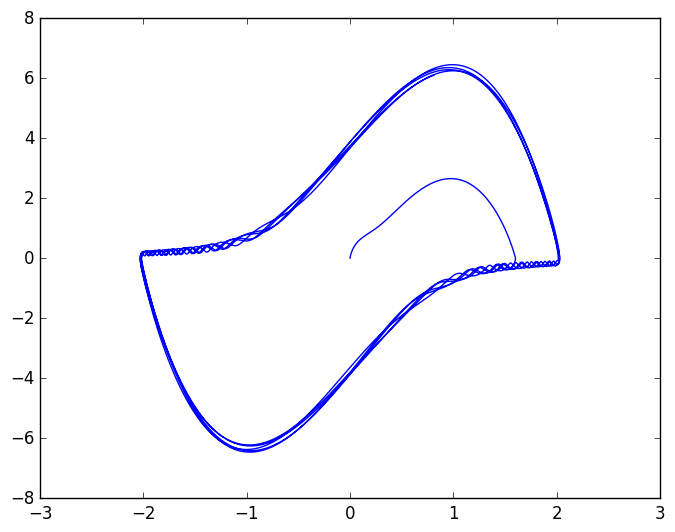

In [8]:
PyPlot.plot(position, velocity, label="Limit Cycle");